In [151]:
# import packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# set working directory
work_dir = '/home/project/organoids'
repo_dir = f'{work_dir}/project_labubu'
results_path = f'{repo_dir}/results/publications'
# create results directory if does not exist
os.makedirs(results_path,exist_ok=True)

In [154]:
#import data
data = pd.read_excel(f"{repo_dir}/data/organoid-proteome-data-clean.xlsx")

In [155]:
# get percent of each species
(data["Вид"].value_counts()/len(data))*100

Вид
Homo sapiens                                                        82.394366
Mus musculus                                                        14.084507
Homo sapiens, Mus musculus                                           1.408451
Mus musculus, Sus scrofa domesticus (domestic pig)                   0.704225
Homo sapiens, Mus musculus, Sus scrofa domesticus (domestic pig)     0.704225
Homo sapiens, Severe acute respiratory syndrome coronavirus 2        0.704225
Name: count, dtype: float64

In [156]:
data["Тип протеомних даних"].unique()

array(['не органоїд', 'тільки органоїд', 'органоїд і тканина',
       'Тільки органоїд', 'Органоїд і тканина', 'Інше'], dtype=object)

In [157]:
data["Тип геномних даних"].unique()

array(['RNA', 'є, але тільки для органоїда чи тканини', 'нема',
       'є. але тільки для органоїда ', 'є, але тільки для тканини',
       'є. але не для органоїда чи тканини', 'DNA & RNA', 'DNA'],
      dtype=object)

In [158]:
# devide in groupes
data["Типи даних"] = data.apply(lambda x: 'NA' if x["Тип протеомних даних"]=='не органоїд' and x["Тип геномних даних"]=='нема' else
                          'Тільки данні\nсеквенування' if x["Тип протеомних даних"]=='не органоїд' and x["Тип геномних даних"]!='нема' else
                          'Тільки протеомнi\nданні' if x["Тип протеомних даних"]!='не органоїд' and x["Тип геномних даних"]=='нема' else 'Обидва типи', axis=1)

In [159]:
# get counts of Типи данихs
data["Типи даних"].value_counts()

Типи даних
Обидва типи                   72
Тільки протеомнi\nданні       38
Тільки данні\nсеквенування    18
NA                            14
Name: count, dtype: int64

In [160]:
# get percents of Типи данихs
((data["Типи даних"].value_counts()/len(data))*100)

Типи даних
Обидва типи                   50.704225
Тільки протеомнi\nданні       26.760563
Тільки данні\nсеквенування    12.676056
NA                             9.859155
Name: count, dtype: float64

In [161]:
# filter out non-organoid omics
data = data[data['Типи даних']!='NA']

In [162]:
# unify labels
# 'не органоїд/тканина' - something else or nothing is studied
labels_map = {'тільки органоїд':'органоїд/тканина',
              'Тільки органоїд':'органоїд/тканина',
              'органоїд і тканина':'органоїд і тканина',
              'Органоїд і тканина':'органоїд і тканина',
              'не органоїд':'не органоїд/тканина',
              'Інше':'органоїд і тканина', #'особливий випадок', - in our case it is a weired pair
              'RNA':'органоїд і тканина',
              'DNA & RNA':'органоїд і тканина',
              'DNA':'органоїд і тканина',
              'є, але тільки для органоїда чи тканини':'органоїд/тканина',
              'нема':'не органоїд/тканина',
              'є. але тільки для органоїда ':'органоїд/тканина',
              'є, але тільки для тканини': 'органоїд/тканина',
              'є. але не для органоїда чи тканини':'не органоїд/тканина'
             }
data['Тип протеомних даних'] = data['Тип протеомних даних'].map(labels_map)
data['Тип геномних даних'] = data['Тип геномних даних'].map(labels_map)

In [163]:
data["Тип протеомних даних"].unique()

array(['не органоїд/тканина', 'органоїд/тканина', 'органоїд і тканина'],
      dtype=object)

In [164]:
data["Тип геномних даних"].unique()

array(['органоїд і тканина', 'органоїд/тканина', 'не органоїд/тканина'],
      dtype=object)

In [165]:
data[data['Типи даних']=='Обидва типи']
data['Набори даних'] = data.apply(lambda x: x['Тип протеомних даних'] if x['Типи даних']=='Тільки протеомнi\nданні' else
                            x['Тип протеомних даних'] if x['Типи даних']=='Тільки протеомнi\nданні' else
                            x['Тип геномних даних'] if x['Типи даних']=='Тільки данні\nсеквенування' else 
                            ('органоїд і тканина' if (x['Тип протеомних даних']=='органоїд і тканина' and x['Тип геномних даних']=='органоїд і тканина') else
                            'особливий випадок' if (x['Тип протеомних даних']=='особливий випадок' or x['Тип геномних даних']=='особливий випадок') else
                             'не органоїд/тканина' if (x['Тип протеомних даних']=='не органоїд/тканина' or x['Тип геномних даних']=='не органоїд/тканина') else
                             'органоїд/тканина' ),axis=1)

In [166]:
# types of datasets across 3 types of data
data['Набори даних'].value_counts()

Набори даних
органоїд/тканина       106
не органоїд/тканина     13
органоїд і тканина       9
Name: count, dtype: int64

In [167]:
# aggregate
data[['Типи даних','Набори даних']].value_counts()

Типи даних                  Набори даних       
Обидва типи                 органоїд/тканина       65
Тільки протеомнi\nданні     органоїд/тканина       32
Тільки данні\nсеквенування  органоїд/тканина        9
                            не органоїд/тканина     7
Тільки протеомнi\nданні     органоїд і тканина      6
Обидва типи                 не органоїд/тканина     6
Тільки данні\nсеквенування  органоїд і тканина      2
Обидва типи                 органоїд і тканина      1
Name: count, dtype: int64

In [168]:
# save
data.to_csv(f'{results_path}/publications_to_plot.tsv',sep='\t')

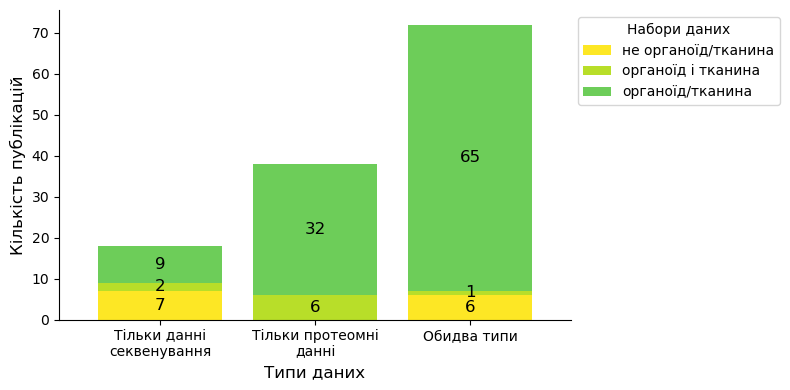

In [172]:
df = data[['Типи даних','Набори даних']].value_counts().reset_index()

pivot = df.pivot_table(
    index="Типи даних",
    columns="Набори даних",
    values="count",
    aggfunc="sum",
    fill_value=0
)

order = [
    "Тільки данні\nсеквенування",
    "Тільки протеомнi\nданні",
    "Обидва типи"
]

pivot = pivot.reindex(order)

ax = pivot.plot(
    kind="bar",
    stacked=True,
    #colormap="viridis_r",
    color=["#FDE725", "#B8DE29", "#6DCD59"],
    figsize=(8, 4),
    width=0.8
)

sns.despine()

# add numbers
for container in ax.containers:
    labels = [int(v) if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=12)

plt.xticks(rotation=360, size=10)
plt.yticks(size=10)
plt.xlabel("Типи даних", size=12)
plt.ylabel("Кількість публікацій", size=12)
plt.legend(title="Набори даних", bbox_to_anchor=(1, 1), fontsize=10)
plt.tight_layout()
# save
plt.savefig(f"{results_path}/publications_barplot.svg", format="svg", bbox_inches ='tight' )
plt.savefig(f"{results_path}/publications_barplot.png", format="png", bbox_inches ='tight' )
plt.show()
